In [693]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [694]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [695]:
df["class"] = (df["class"] == "g").astype(int)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [696]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int32  
dtypes: float64(10), int32(1)
memory usage: 1.5 MB


In [697]:
# Step 2: Calculate the value counts of the specific column
value_counts = df['class'].value_counts()

# Step 3: Calculate the total number of rows in the column
total_rows = len(df)
# Step 4: Calculate the percentage of each value
percentages = (value_counts / total_rows) * 100

# Optionally, you can sort the result by percentage in descending order
percentages_sorted = percentages.sort_values(ascending=False)

# Display the result
print(percentages_sorted)

class
1    64.837014
0    35.162986
Name: count, dtype: float64


In [698]:
correlation = df.corr()
correlation['class'].sort_values(ascending=False)

class       1.000000
fM3Long     0.193409
fAsym       0.173587
fConc       0.024615
fConc1      0.004797
fM3Trans   -0.003837
fDist      -0.065203
fSize      -0.117795
fWidth     -0.265596
fLength    -0.307572
fAlpha     -0.460979
Name: class, dtype: float64

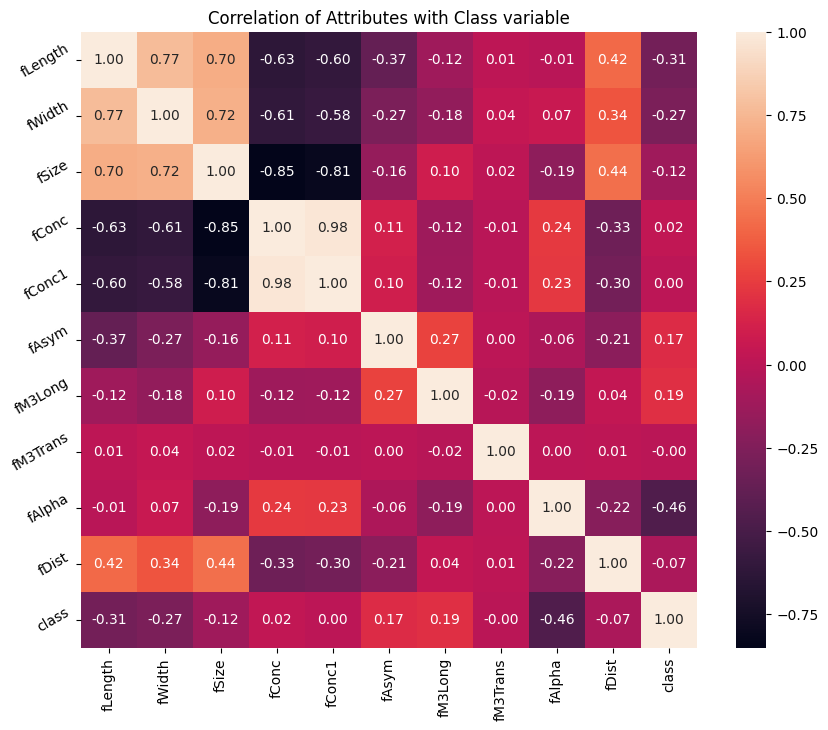

In [699]:


plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [700]:
X = df.drop(["class"],axis=1)
y = df['class']

In [701]:


# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
# check the shape of X_train and X_test
X_test

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
18152,17.1822,15.8933,2.4093,0.6648,0.3864,-16.4698,-3.1572,-3.9904,66.9122,61.0713
2571,33.7228,18.2951,3.0639,0.2676,0.1394,32.5576,18.3456,-4.4196,11.0782,94.1792
12202,61.3737,21.3660,3.2621,0.1816,0.1053,-2.9857,31.7738,-12.2608,0.9761,236.9240
4508,20.0044,11.0652,2.2788,0.6737,0.4500,13.7202,19.7044,-9.9991,59.4730,197.5840
14903,21.2509,10.8657,2.1847,0.5686,0.2843,14.7015,17.9440,7.8355,7.1820,123.8400
...,...,...,...,...,...,...,...,...,...,...
10085,20.4596,10.3072,2.2504,0.5899,0.3567,-5.3761,16.3988,-9.2864,3.2940,73.5772
11931,108.8900,14.0158,2.4502,0.4078,0.2358,57.1641,104.7600,-5.8517,58.0550,86.6984
3309,18.0933,15.3799,2.2978,0.5441,0.3350,-5.8481,15.9569,-10.4222,82.7585,137.2320
3572,20.8833,16.8717,2.5611,0.5687,0.3585,-5.7111,16.1787,-11.0063,17.9992,249.1740


In [702]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train

array([[ 0.09813278, -0.10857165, -0.29908805, ...,  0.55069096,
        -0.06165756,  0.32044428],
       [-0.59640297, -0.44038109, -0.29718414, ..., -0.45184014,
         0.3939096 , -1.28278963],
       [-0.11416815,  0.02638088,  0.27208578, ...,  1.17107692,
        -0.87546122,  0.97775601],
       ...,
       [-0.40905323, -0.28753933,  0.11808039, ...,  0.52617157,
        -1.04190412,  0.55226505],
       [-0.77609912, -0.5043904 , -0.88570474, ...,  0.36271846,
        -0.23117848,  0.24756873],
       [-0.60870006, -0.51807515, -0.20220005, ..., -0.48441829,
        -0.9150741 , -0.10927523]])

In [703]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn.fit(X_train, y_train)
print(knn.classes_)

[0 1]


In [704]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [705]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8333


In [706]:
y_pred_test = knn.predict(X_test)
print(y_pred_test)
X_test

[1 1 1 ... 1 0 0]


array([[-0.84415078, -0.34147619, -0.87808908, ..., -0.20274787,
         1.49852757, -1.7733922 ],
       [-0.45819025, -0.2121763 ,  0.50669015, ..., -0.22320214,
        -0.63636159, -1.33035946],
       [ 0.18701949, -0.04685568,  0.92597405, ..., -0.5968882 ,
        -1.02262916,  0.57977738],
       ...,
       [-0.82289105, -0.36911487, -1.11396272, ..., -0.50926651,
         2.10443247, -0.75424923],
       [-0.75778882, -0.28880444, -0.55696246, ..., -0.53710282,
        -0.37172771,  0.74370052],
       [ 1.1220718 ,  1.97252251,  2.21259601, ..., -1.36653509,
        -0.11543701,  2.86154738]])

In [707]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8831
Test set score: 0.8333
